# Chapter 5. 회귀

## 1. 회귀 소개
**회귀**는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭합니다.
- 회귀 계수(Regression coefficients): 독립변수의 값에 영향을 미치는 계수($W_{1}, W_{2}, ...$)
독립변수는 피처(x1, x2, x3, ...), 종속변수는 결정 값(y)

주어진 x와 y값에 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것 입니다.

**규제**는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말합니다.

- 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual sum of squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

- 릿지(Ridge): 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델

- 라쏘(Lasso): 선형 회귀에 L1 규제를 추가한 회귀 모델. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것

- 엘라스틱넷(ElasticNet): L2와 L1 규제를 함께 결합한 모델. 피처가 많은 데이터 세트에 적용되며 L1 규제로 피처의 개수를 줄이고 L2 규제로 계수 값의 크기를 조정.

- 로지스틱 회귀(Logistic Regression): 분류에 사용되는 알고리즘


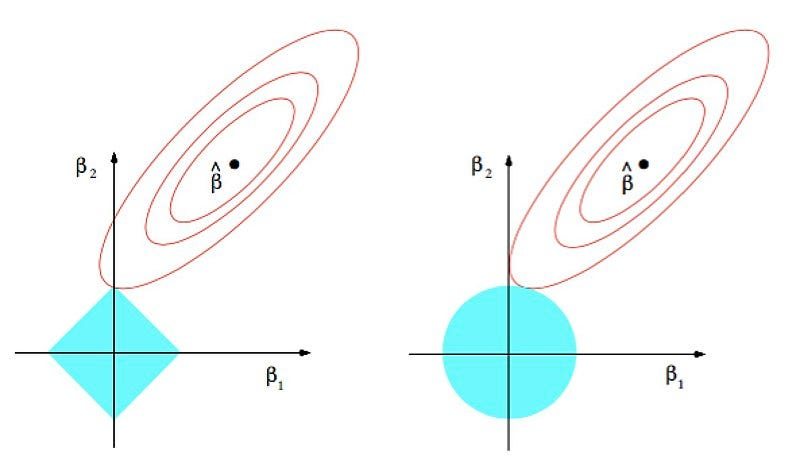

왜 L1이 0으로 회귀하고 L2는 그렇지 않을까에 대해서 항상 궁금했었는데, 위 사진으로 해결이 되었습니다. 최적화 과정에서, 꼭지점 중 하나가 최소 손실을 가지는 지점으로 선택되면, 해당 꼭지점에 위치한 계수의 값은 0이 됩니다.

## 2. 단순 선형 회귀를 통한 회귀 이해
잔차(Residual): 실제 값과 회귀 모델의 차이에 따른 오류 값
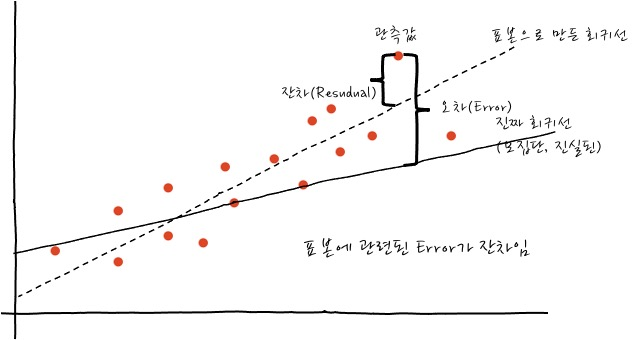
최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미입니다. 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 됩니다.

비용함수(Cost function)의 최소 오류 값을 구합니다.
- Mean Absolute Error(MAE): 절댓값을 취해서 더하는 함수
- Residual Sum of Square(RSS): 오류 값의 제곱을 구해서 더하는 방식, 제곱이 있어서 미분하기 편함
$ RSS(w_{0}, w_{1}) = \frac{1}{N} \sum_{i=1}^{N}(y_{i} - (w_{0}+w_{1}*x_{i}))^2$

## 3. 비용 최소화하기 - 경사 하강법 (Gradient Descent) 소개

경사 하강법은 '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식입니다. 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나갑니다.

위에 소개된 RSS는 $w_{0}, w_{1}$을 각각 가지고 있기 때문에 각 변수에 편미분을 적용해야 합니다.

$ \frac{\partial{R(w)}}{\partial{w_1}} = \frac{2}{N} \sum_{i=1}^{N} -x_{i}*(y_{i}-(w_{0}+w_{1}x_{i})) = -\frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i} - 예측값_{i})$

$ \frac{\partial{R(w)}}{\partial{w_0}} = \frac{2}{N} \sum_{i=1}^{N} -(y_{i}-(w_{0}+w_{1}x_{i})) = -\frac{2}{N}\sum_{i=1}^{N}(실제값_{i} - 예측값_{i})$

위 편미분 값이 너무 클 수 있기 때문에 보정 계수인 $\eta$, 학습률을 곱합니다.

$ w_{1} = 이전 w_{1} + \eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i} - 예측값_{i})$

$ w_{0} = 이전 w_{0} + \eta \frac{2}{N}\sum_{i=1}^{N}(실제값_{i} - 예측값_{i})$

경사 하강법 과정
1. $w_{1}, w_{0}$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산합니다.
2. $w_{1} $을 $w_{1} + \eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i} - 예측값_{i})$으로, $ w_{0}$ 을 $w_{0} + \eta \frac{2}{N}\sum_{i=1}^{N}(실제값_{i} - 예측값_{i})$으로 업데이트한 후 다시 비용 함수의 값을 계산합니다.
3. 비용 함수의 값이 감소했으면 다시 Step 2를 반복합니다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $w_{0}, w_{1}$를 구하고 반복을 중지합니다.


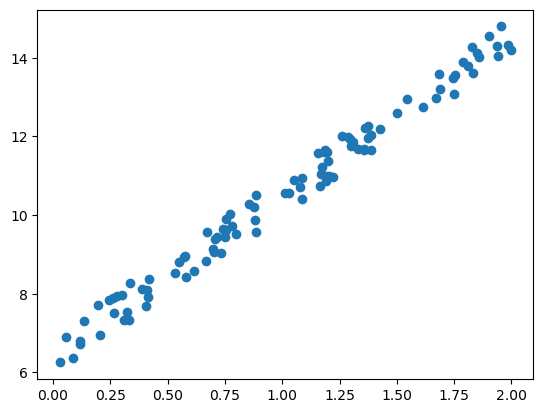

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

plt.scatter(X, y)

In [2]:
# 비용함수 RSS 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

# w1, w0 업데이트
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    w0_factors = np.ones((N,1))

    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update


def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.1407 w0:6.3512
gradient descent total cost: 0.0835


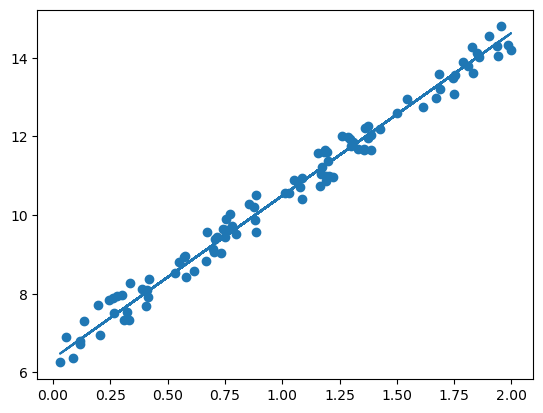

In [3]:
w1, w0 = gradient_descent_steps(X, y, 1000)

print("w1:{0:.4f} w0:{1:.4f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("gradient descent total cost: {0:.4f}".format(get_cost(y, y_pred)))
plt.scatter(X, y)
plt.plot(X, y_pred)

경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용합수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있습니다. 대부분 확률적 경사 하강법(Stochastic Gradient Descent)이나 미니 배치를 이용합니다. 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장합니다. 

In [4]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.1243 w0:6.3608
Stochastic gradient descent total cost: 0.0829


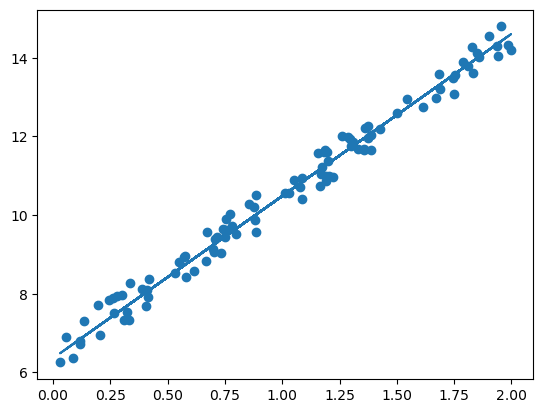

In [5]:
w1, w0 = stochastic_gradient_descent_steps(X, y, 10,  1000)

print("w1:{0:.4f} w0:{1:.4f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Stochastic gradient descent total cost: {0:.4f}".format(get_cost(y, y_pred)))
plt.scatter(X, y)
plt.plot(X, y_pred)

## 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

LinearRegression 
- 입력 파라미터
    - fit_intercept(default: True): boolean value, Intercept(절편) 값을 계산할 것인지 말지를 지정
    - normalize(default: False): True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화
- 속성
    - coef_: 회귀 계수가 배열 형탤 저장하는 속성
    - intercept_: 절편 값

Ordinary Least Squares(OLS)기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받습니다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해집니다. 이를 다중공선성(multi-collinearity) 문제라고 합니다.

- 상관관계(correlation): 두 변수 간의 선형적 관계의 정도를 나타내는 통계적 척도입니다. 변수 사이의 상관관계가 있을 경우, **한 변수의 변화가 다른 변수의 변화와 일정한 관계를 가지고 있다**는 것을 의미합니다. 상관관계의 값은 -1부터 +1까지의 범위를 가지며, 이 값을 상관계수(correlation coefficient)라고 합니다.
    - 상관계수가 +1에 가까울 때: 두 변수 간에 강한 양의 선형 관계가 있음을 의미합니다. 한 변수가 증가할 때 다른 변수도 비례하여 증가합니다.
    
    - 상관계수가 -1에 가까울 때: 두 변수 간에 강한 음의 선형 관계가 있음을 의미합니다. 한 변수가 증가할 때 다른 변수는 비례하여 감소합니다.
    
    - 상관계수가 0에 가까울 때: 두 변수 간에 선형적인 관계가 없음을 의미합니다. 한 변수의 변화가 다른 변수의 변화와 관련이 없습니다.


다중공선성의 영향
- 계수 추정의 불안정성: 피처들 간에 높은 상관관계(1에 가까움)가 있으면, 이들 피처의 계수를 추정하는 과정에서 작은 변화나 새로운 데이터의 추가가 계수 추정값에 큰 영향을 미칩니다. 이는 모델의 계수가 데이터의 작은 변화에 대해 매우 민감하게 반응하게 만들며, 결과적으로 모델의 분산이 커지게 만듭니다.

- 추정치의 정확성 저하: 다중공선성이 있을 때, 특정 피처의 영향을 다른 피처와 분리하여 추정하는 것이 어렵습니다. 이로 인해 계수의 추정치가 실제보다 훨씬 더 크거나 작게 나타날 수 있으며, 이는 모델의 예측 정확성을 저하시킵니다.

- 해석의 어려움: 피처들이 서로 높은 상관관계를 가지고 있으면, 각 피처의 독립적인 영향력을 분리해서 해석하는 것이 어렵습니다. 이는 모델의 결과를 해석하고 이해하는 데 큰 어려움을 초래합니다.

다중공선성의 해결방안
- 변수 선택(Feature Selection): 상관관계가 높은 피처 중 일부를 제거하여 다중공선성 문제를 완화할 수 있습니다.

- 정규화(Regularization): L1 또는 L2 정규화와 같은 방법을 사용하여 모델의 복잡성을 줄이고, 계수의 크기에 페널티를 부여함으로써 과적합과 분산을 줄일 수 있습니다.

- 주성분 분석(PCA): 피처들을 새로운 주성분으로 변환하여, 상관관계가 낮은 새로운 변수 세트를 생성합니다.


회귀 평가 지표
- MAE(Mean Absolute Error): $MAE = \frac{1}{n}\sum_{i=1}^{n} |Y_{i}-\hat{Y_{i}}|$
- MSE(Mean Squared Error): $MSE = \frac{1}{n}\sum_{i=1}^{n} (Y_{i}-\hat{Y_{i}})^2$
- RMSE(Root Mean Squared Error): $MSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (Y_{i}-\hat{Y_{i}})^2}$
- $R^{2}$: 분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다. $R^{2} = \frac{예측값 Variance}{실제값 Variance}$

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import datasets

bostonDF, y = datasets.fetch_openml('boston', return_X_y=True)

# load_boston은 삭제되었습니다.
# boston = load_boston()
# bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = y
print(type(X))
print('Boston 데이터 크기: ')
bostonDF.head()

<class 'pandas.core.frame.DataFrame'>
Boston 데이터 크기: 


C:\Users\jinho\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\jinho\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


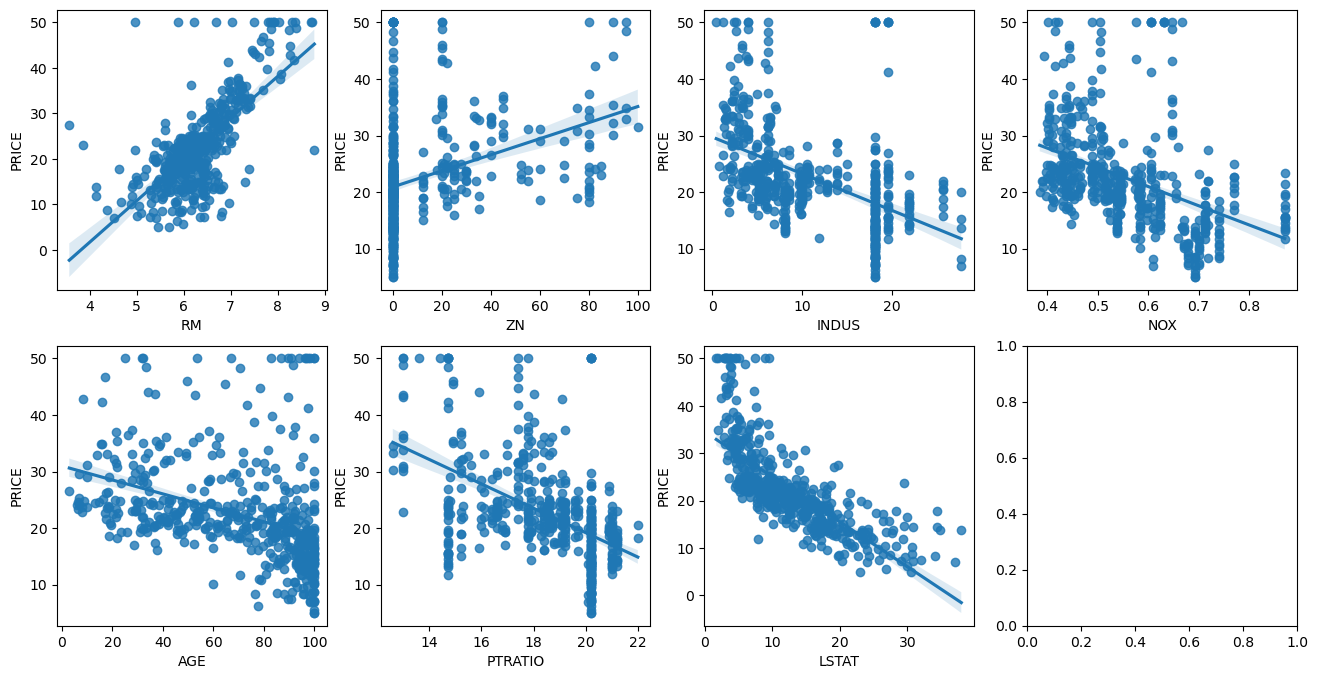

In [15]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS','NOX', 'AGE', 'PTRATIO', 'LSTAT']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
# categorical 데이터를 원-핫 인코딩으로 변
X_data = pd.get_dummies(X_data, columns=['CHAS', 'RAD'])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE: {0:.4f} RMSE: {1:.4f}".format(mse, rmse))
print("Variance Score: {0:.4f}".format(r2_score(y_test, y_preds)))

MSE: 22.8038 RMSE: 4.7753
Variance Score: 0.7343


In [31]:
print("절편 값: ", lr.intercept_)
print("회귀 계수 값: ", np.round(lr.coef_, 1))

절편 값:  52.02299685411849
회귀 계수 값:  [ -0.1   0.1   0.1 -24.    2.7   0.   -1.5  -0.   -1.1   0.   -0.6  -1.1
   1.1  -3.5  -2.    5.3   1.1  -0.8  -0.1  -2.4   0.8   1.8]


In [32]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RAD_24      5.3
RM          2.7
RAD_8       1.8
CHAS_1      1.1
RAD_3       1.1
RAD_7       0.8
INDUS       0.1
ZN          0.1
AGE         0.0
TAX        -0.0
B           0.0
RAD_5      -0.1
CRIM       -0.1
LSTAT      -0.6
RAD_4      -0.8
PTRATIO    -1.1
CHAS_0     -1.1
DIS        -1.5
RAD_2      -2.0
RAD_6      -2.4
RAD_1      -3.5
NOX       -24.0
dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE score: ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.4f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-13.39 -23.42 -35.75 -80.61 -36.29]
5 folds의 개별 RMSE score:  [3.66 4.84 5.98 8.98 6.02]
5 folds의 평균 RMSE: 5.8958


## 5. 다항 회귀와 과대적합/과소적합 이해
다항(polynomial)회귀: 2차, 3차 방정식과 같은 다항식으로 표현되는 것 입니다.
다항 회귀는 선형 회귀입니다. 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관합니다.($x^{2}$을 $z_{1}$과 같이 표현할 수 있기 때문)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피처: \n", X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처: \n", poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


$[x_{1}, x_{2}]$ 를 $[1, x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}]$로 변경합니다.

In [35]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피처: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값: \n", y)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [36]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

print("변환된 3차 다항식 계수 feature: \n", poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수\n", np.round(model.coef_, 2))
print("Polynomial 회귀 shape\n", model.coef_.shape)

변환된 3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape
 (10,)
